In [1]:
%matplotlib inline
from sqlalchemy import create_engine, text
import json
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

# setting up a visual style for PyPlot, much better than the standard
plt.style.use('fivethirtyeight')

# Your database url as specified in configuration.yaml
# If using default settings, it's \
# sqlite:///<path to config dir>/home-assistant_v2.db
DB_URL = "sqlite:////home/hass/.homeassistant/home-assistant_v2.db"
engine = create_engine(DB_URL)

In [2]:
# Let's query the states table of our database, get a list of entities \
# and number of statuses they've created
list(engine.execute("SELECT entity_id, COUNT(*) FROM states \
GROUP BY entity_id ORDER by 2 DESC"))

[('sun.sun', 11149),
 ('sensor.date__time', 11137),
 ('sensor.glances_ram_free', 7275),
 ('sensor.glances_ram_use_2', 7265),
 ('sensor.ram_mean', 6341),
 ('sensor.glances_ram_use', 6332),
 ('sensor.glances_sleeping', 5986),
 ('sensor.glances_thread', 5926),
 ('sensor.glances_total', 5855),
 ('sensor.cpu_mean', 5095),
 ('sensor.glances_cpu_load', 5086),
 ('sensor.stats_ram_mean', 4935),
 ('sensor.dark_sky_wind_speed', 4437),
 ('sensor.stats_ram_std', 4157),
 ('sensor.dark_sky_apparent_temperature', 3455),
 ('sensor.dark_sky_visibility', 3355),
 ('light.couch_left', 2870),
 ('sensor.glances_running', 2864),
 ('climate.living_room', 2679),
 ('sensor.living_room_mean', 2539),
 ('sensor.dark_sky_dew_point', 2533),
 ('sensor.living_room_temperature', 2530),
 ('light.kitchen', 2481),
 ('light.kitchen_table', 2481),
 ('sensor.dark_sky_ozone', 2469),
 ('sensor.dark_sky_temperature', 2453),
 ('sensor.stats_living_room_mean', 2319),
 ('sensor.thermo_temp', 2212),
 ('sensor.dark_sky_wind_bearing',

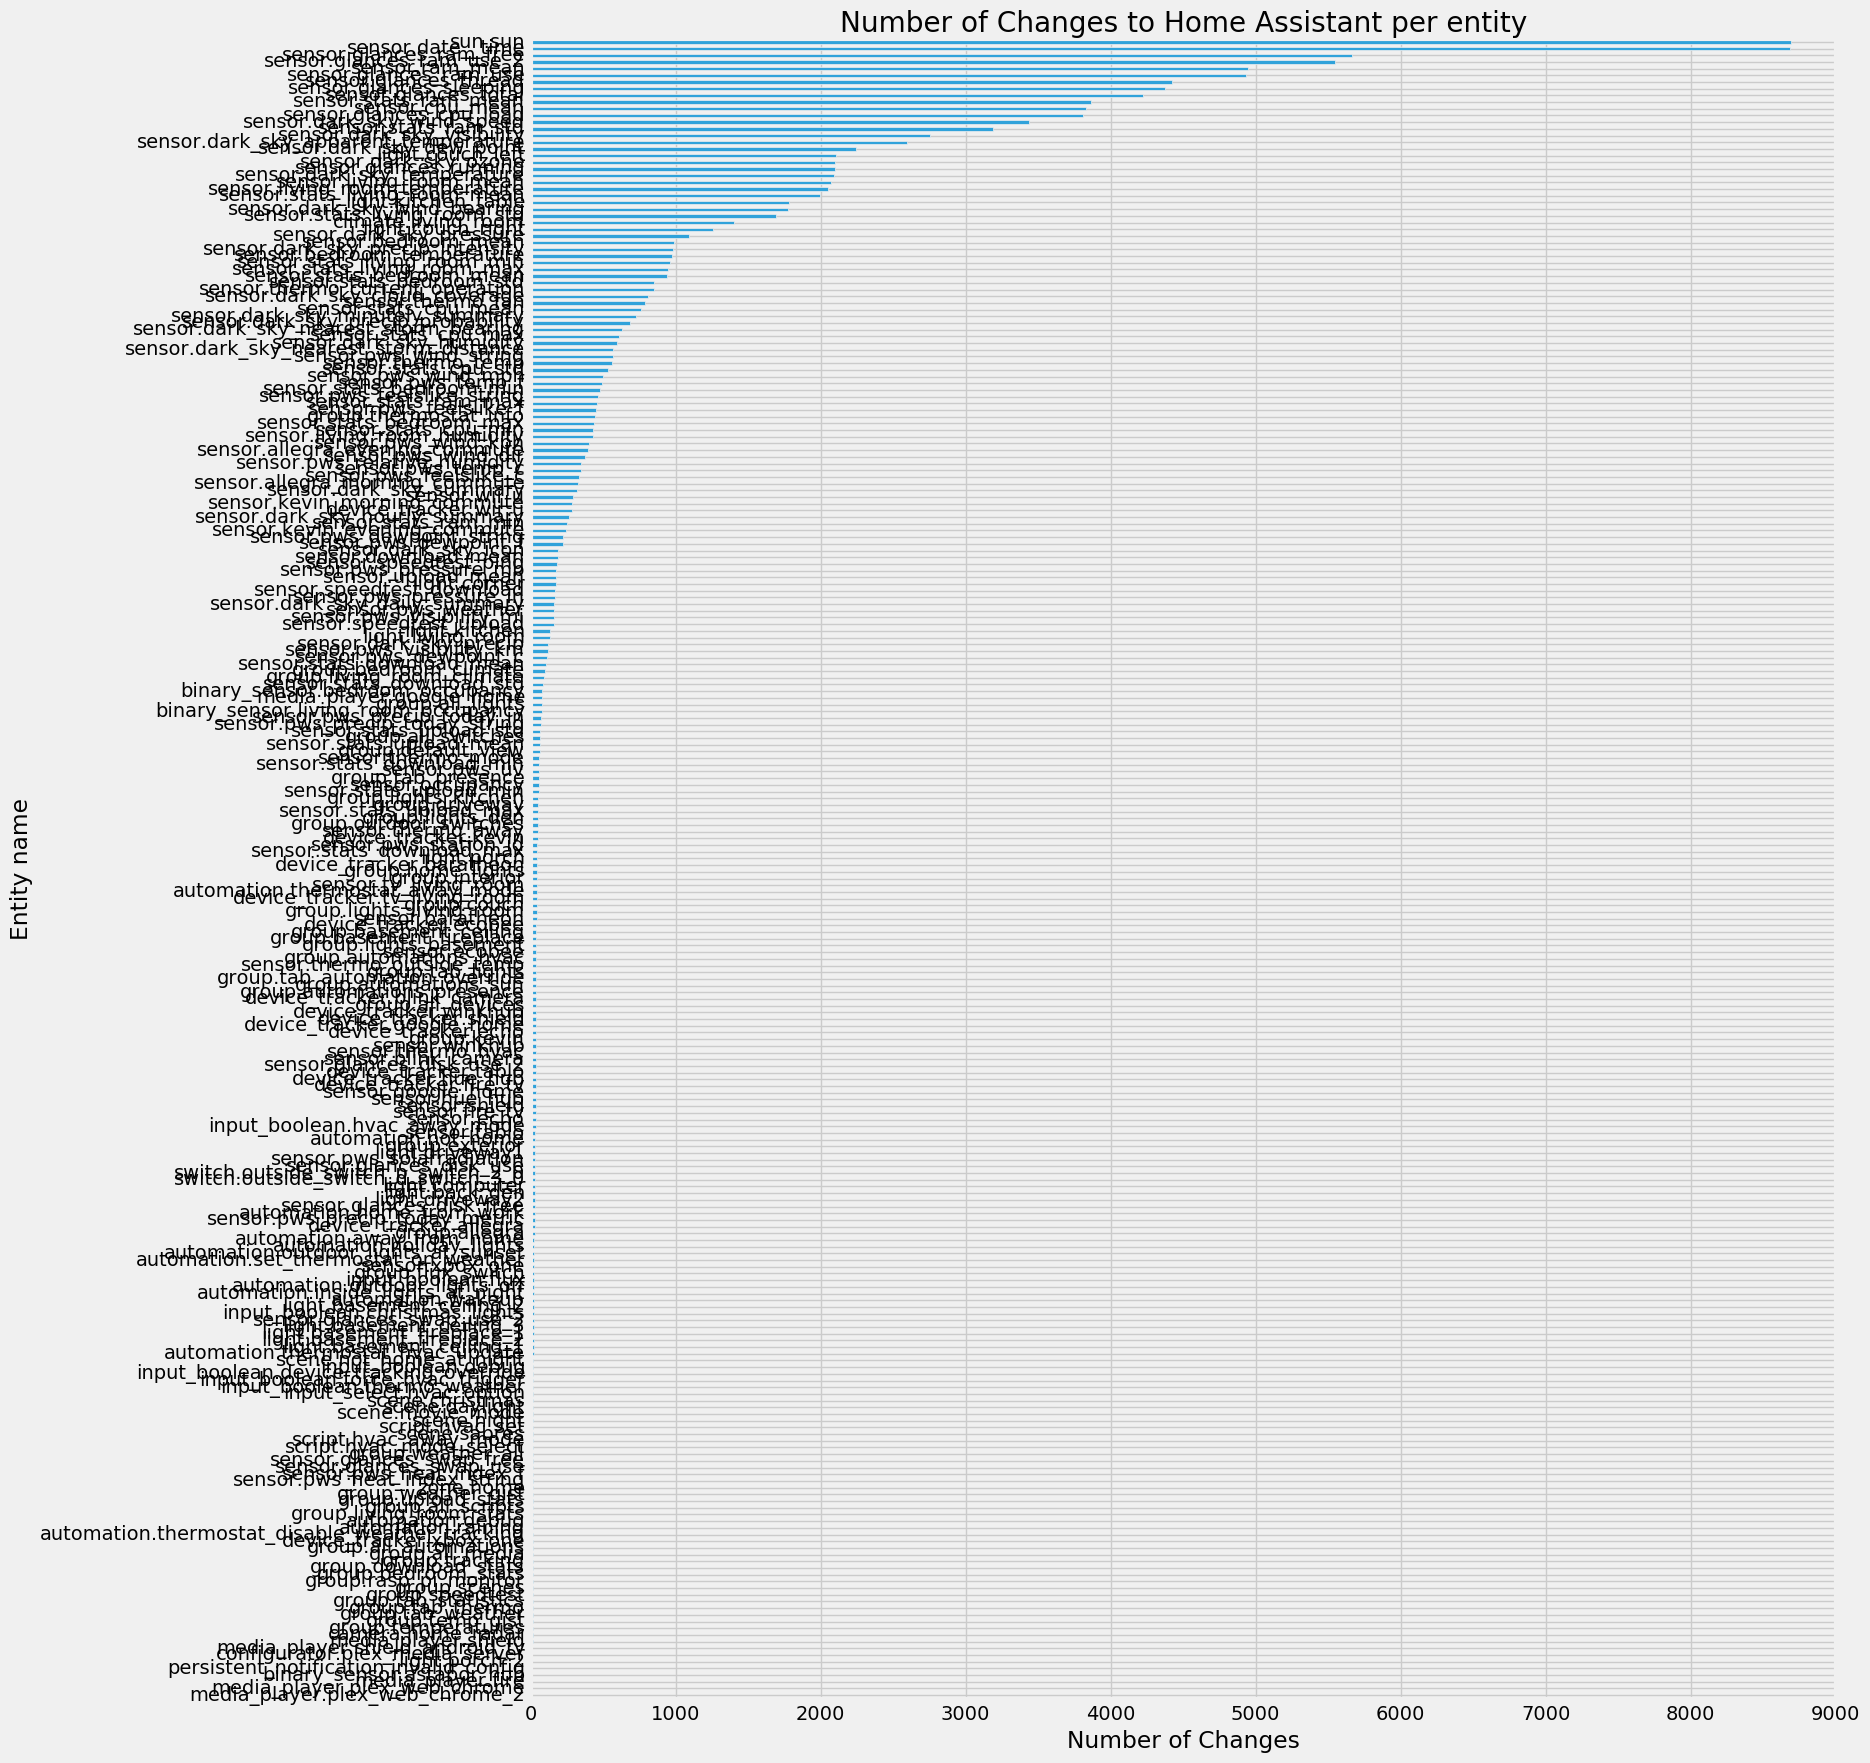

In [5]:
# executing our SQL query against the database and storing the output
entityquery = engine.execute("SELECT entity_id, COUNT(*) FROM states \
GROUP BY entity_id ORDER by 2 DESC")

# fetching th equery reults and reading it into a DataFrame
entitycallsDF = pd.DataFrame(entityquery.fetchall())

# naming the dataframe columns
entitycallsDF.columns = ['entity', 'Number of Changes']

# setting the entity name as an index of a new dataframe and sorting it \
# by the Number of Changes
ordered_indexed_df = entitycallsDF.set_index(['entity']).\
    sort_values(by='Number of Changes')

# displaying the data as a horizontal bar plot with a title and no legend
changesplot = ordered_indexed_df.plot(kind='barh', title='Number of Changes \
to Home Assistant per entity', figsize=(15, 20), legend=False)

# specifying labels for the X and Y axes
changesplot.set_xlabel('Number of Changes')
changesplot.set_ylabel('Entity name')